<a href="https://colab.research.google.com/github/Khangarajesh/Smartprix_end_to_end_data_analysis/blob/master/smartprix_data_cleaning_and_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
from bs4 import BeautifulSoup
import re
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
#

In [ ]:
with open('smartprix.html', 'r', encoding  = 'utf-8') as f:
  html = f.read()
  
html

'<html lang="en" class="way-item-finder" style="--window-width:1034;"><head><meta charset="utf-8"><meta name="viewport" content="width=device-width"><title>Mobile Phones In Stock | Smartprix</title><link rel="icon" type="image/png" sizes="32x32" href="/sm-32x32.png"><link rel="apple-touch-icon" sizes="180x180" href="/apple-touch-icon.png"><meta name="theme-color" content="#4692F0"><link rel="manifest" href="/manifest.json"><meta property="fb:app_id" content="171761809591603"><link rel="canonical" href="https://www.smartprix.com/mobiles/exclude_out_of_stock-exclude_upcoming-stock"><meta property="og:site_name" content="Smartprix"><meta name="twitter:site" content="@smartprix"><meta name="twitter:creator" content="@smartprix"><meta name="twitter:card" content="summary"><link rel="search" href="/smartprix_search.xml" type="application/opensearchdescription+xml" title="Smartprix Search: Find the best price"><script type="application/ld+json">{"@type":"Organization","@context":"http://schem

**Data Extraction Using Beautifulsoup**

In [ ]:
soup = BeautifulSoup(html)

In [ ]:
name = []
spec_scpre = []
img = []
sim = []
processor = []
storage = []
battery = []
display = []
camera = []
memmory = []
version = []
price = []
for i in soup.find_all('div', class_="sm-product has-tag has-features has-actions"):
  #extract name
  name.append(i.find('h2').text.strip())
  #extract spec score
  try:
    spec_scpre.append(i.find('div', class_= 'score rank-2-bg').find('b').text)
  except:
    spec_scpre.append(np.nan)
  #extract image link
  img.append(i.find('div', class_ = 'sm-img-wrap').find('img').get('src'))
  #extract sim info
  sim.append(i.find_all('li')[0].text)
  #extract processor
  processor.append(i.find_all('li')[1].text)
  #extract storage
  storage.append(i.find_all('li')[2].text)
  #extract battery power
  battery.append(i.find_all('li')[3].text)
  #dextract display info
  display.append(i.find_all('li')[4].text)
  #extract camera info 
  try:
    camera.append(i.find_all('li')[5].text)
  except:
    camera.append(np.nan)
  #extract memmory info
  try :
    memmory.append(i.find_all('li')[6].text)
  except:
    memmory.append(np.nan)
  #extract version info
  try:
    version.append(i.find_all('li')[7].text)
  except:
    version.append(np.nan)
  #extract price
  price.append(i.find('span', class_='price').text)

In [ ]:
df = pd.DataFrame({
   'img':img, 
   'name':name,
   'price':price,
   'spec_scpre':spec_scpre,
   'sim':sim,
   'processor':processor,
   'storage':storage,
   'battery':battery,
   'display':display,
   'camera':camera,
   'memmory':memmory,
   'version':version

})

**Data Accessing**

This data contains information of smart phones and its detail which I have extracted from https://www.smartprix.com/mobiles.

**columns**


*   img : Smart phone image

*   name : Smart phone name

*   spec_scpre : Score given by smartprix. Higher the score better is the phone

*   sim : 3G, 4G, 5G support, VoLTE wifi, NFC ,IR blaster support 
*   processor : processor name, processing systems and clock speed (processing systems and clock speed are responsible for mobile performance


*   storage : RAM AND ROM information


*   battery : Batttery capacity and battery charging speed


*   display : Scrren size, screen resolution , refressh rate


*   camera : Rear camera and front camera mega pixle

*   memmory : Memorry card support and extention
*   version : Version of mobile ( Android, ios)


*   price : Mobile phone price





**Data Accessing**

*Quality Issues*

*   name column contains name ,5G support and memmory information `validity`
*   OPPO written differently Oppo `consistency`
*   spec_score column contains null values `completeness`


*   Feature phones are present in a data `validity`(541, 570. 572, 576, 619, 621, 624,626,635, 644,660,661)
*   596, 629Ram not given `consistency`
*   Fast charging value not mention for some phones `consistency`
*   389 390 592 674row in camera column contains unwanted info `validity`
*   version column containing memmory card No FM Radio , Bluetooth  `validity`

*Tidiness Issues*


*   5g,NFC, IR BLASTER present in sim column , need to assign seperate column for each


*   processor name, processing systems and clock speed given in singlr processor column 
*   839, 932 shifted to right 
*  77, 110, 190, 275, 420, 511, 512, 596, 629, 730, 796 data shifted left


*   Ram Rom stored in single column
*   battery capacity and w fast charging in a same column
*   Display column contains Scrren size, screen resolution , refressh rate and display type in same column 
*   Front and rear camera present in a same a column
*   389 390 592 674, 280 shifted to right camera
*   7, 8, 12, 15 , 23 shifted left
*   Memmory card support and extension present in a same column 





##Data Cleaning

In [ ]:
df.shape

(960, 12)

In [ ]:
df.head()

,img,name,price,spec_scpre,sim,processor,storage,battery,display,camera,memmory,version
0,https://cdn1.smartprix.com/rx-iGNlyOFEo-w280-h...,OnePlus Nord CE 2 Lite 5G,"₹18,999",81,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
1,https://cdn1.smartprix.com/rx-iCDx5JIUn-w280-h...,Motorola Moto G62 5G,"₹14,999",81,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,https://cdn1.smartprix.com/rx-iKWyXqzam-w280-h...,Realme 10 Pro Plus,"₹24,999",82,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
3,https://cdn1.smartprix.com/rx-ixLSVBm6G-w280-h...,Samsung Galaxy A14 5G,"₹16,499",75,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
4,https://cdn1.smartprix.com/rx-iVyp4t2Vm-w280-h...,Apple iPhone 14,"₹72,990",81,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor","6 GB RAM, 128 GB inbuilt",3279 mAh Battery with Fast Charging,"6.1 inches, 1170 x 2532 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v16


In [ ]:
df.to_excel('smartprix.xlsx')

In [ ]:
#chacking name column
#df['name'].str.split().str.get(0).value_counts()

In [ ]:
df['index'] = np.array(range(2,962))
df.set_index('index',inplace =True)

##Remove Feature phone

after observing the data i found that most of the feature phones has price below 3400. So we will remove them from our data.

In [ ]:
df.loc[[541,570,572,576,619,621,624,626,635,644,660,661], : ]

,img,name,price,spec_scpre,sim,processor,storage,battery,display,camera,memmory,version
index,,,,,,,,,,,,
541,https://cdn1.smartprix.com/rx-ilvmwXGjd-w280-h...,Samsung Guru E1200,"₹1,663",NaN,Single Sim,No Wifi,800 mAh Battery,"1.5 inches, 128 x 128 px Display",No Rear Camera,No FM Radio,NaN,NaN
570,https://cdn1.smartprix.com/rx-iJs39agGN-w280-h...,Saregama Carvaan M21 Bengali,"₹2,490",NaN,Dual Sim,MTK,"32 MB RAM, 2 GB inbuilt",2500 mAh Battery,2.4 inches Display,Main Rear Camera,"Memory Card Supported, upto 8 GB",Bluetooth
572,https://cdn1.smartprix.com/rx-i80jVeRWV-w280-h...,Itel it5029,"₹1,379",NaN,Dual Sim,1 MHz Processor,"32 MB RAM, 32 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",No FM Radio
576,https://cdn1.smartprix.com/rx-iHeuhulnD-w280-h...,Nokia 110 (2022),"₹1,596",NaN,Dual Sim,No Wifi,"4 MB RAM, 4 MB inbuilt",1000 mAh Battery,"1.77 inches, 120 x 160 px Display","Memory Card Supported, upto 32 GB",NaN,NaN
619,https://cdn1.smartprix.com/rx-ixIuPWvRw-w280-h...,iKall K99 Pro,"₹1,279",NaN,Dual Sim,"32 MB RAM, 32 MB inbuilt",2500 mAh Battery,"2.4 inches, 128 x 160 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 64 GB",Bluetooth,NaN
621,https://cdn1.smartprix.com/rx-iPxtBJRvp-w280-h...,Saregama Carvaan M21,"₹2,449",NaN,Dual Sim,MTK,"32 MB RAM, 2 GB inbuilt",2500 mAh Battery,2.4 inches Display,Main Rear Camera,"Memory Card Supported, upto 8 GB",Bluetooth
624,https://cdn1.smartprix.com/rx-iguTDe0Ni-w280-h...,Nokia 105 Dual Sim 2022,"₹1,449",NaN,Dual Sim,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 128 x 160 px Display",No Rear Camera,NaN,NaN,NaN
626,https://cdn1.smartprix.com/rx-i7rBB1dUx-w280-h...,Kechaoda K55 Pro,"₹1,190",NaN,Dual Sim,"32 MB RAM, 64 MB inbuilt",400 mAh Battery,"1.8 inches, 320 x 480 px Display",1.3 MP Rear Camera,No FM Radio,NaN,NaN
635,https://cdn1.smartprix.com/rx-iNSd08ERQ-w280-h...,Saregama Carvaan M11 Bengali,"₹1,990",NaN,Dual Sim,MTK,"32 MB RAM, 2 GB inbuilt",1800 mAh Battery,1.8 inches Display,No Rear Camera,"Memory Card Supported, upto 8 GB",Bluetooth


In [ ]:
df['price'] = df['price'].str.replace('₹', '').str.replace(',', '').astype('int')

In [ ]:
df[df['price'].between(3000,3400)]
pd.set_option('display.max_rows', 500)

In [ ]:
df = df[df['price'] > 3400]

In [ ]:
df.head(2)
df.shape

(862, 12)

In [ ]:
df = df[~df['sim'].isin(['Single Sim, 3G, 4G, Wi-Fi, HDMI', 'Dual Sim', 'Dual Sim, 3G, 4G, VoLTE', 'Dual Sim, 3G, 4G'])]
df.shape

(856, 12)

In [ ]:
df.to_excel('smart.xlsx')

##Define
`name` 
1.   replace 5G with '' using replace 
2.   replace (storage info ) with '' using regex

`sim`
1.   Create different column for 5G NFC AND IR Blaster using apply function

`memmory and version`


1.  shifted columns acordingly using shift metode





## Column shifting

In [ ]:
#77, 110, 190, 275, 420, 511, 512, 596, 629, 730, 796
#389 390 592 674, 280
#7, 8, 12, 15 , 23
#839,932

In [ ]:
df.loc[[7, 8, 12, 15 , 23, 77, 110, 190, 275, 280, 389, 390, 420, 511, 512, 592, 596, 629, 730, 796, 839, 932], 'name':]

,name,price,spec_scpre,sim,processor,storage,battery,display,camera,memmory,version
index,,,,,,,,,,,
7,Nothing Phone 1,29789,85,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,Android v12,No FM Radio
8,OnePlus Nord 2T 5G,28999,84,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Android v12,No FM Radio
12,Xiaomi Redmi Note 12 Pro 5G,24730,79,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio
15,OnePlus 10R 5G,32999,86,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 8100 Max, Octa Core, 2.85 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,Bluetooth
23,Vivo V25 Pro 5G,35999,85,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4830 mAh Battery with 66W Fast Charging,"6.56 inches, 1080 x 2376 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Android v12,No FM Radio
77,Apple iPhone 12,53999,74,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
110,Apple iPhone 12 Mini,41999,74,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
190,Apple iPhone 12 (128GB),56999,75,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
275,Vivo T1 Pro,23999,81,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 778G, Octa Core, 2.4 GHz Processor","6 GB RAM, 128 GB inbuilt",4700 mAh Battery with 66W Fast Charging,"6.44 inches, 1080 x 2404 px, 90 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12


In [ ]:
# memmory column containing android word shifte to =>right
temp_df = df[df['memmory'].str.contains('Android')]
x = temp_df.iloc[:,10:].shift(1, axis = 1).values
df.loc[temp_df.index, temp_df.columns[10:]] = x

In [ ]:
# memmory column containing iOS word shifte to =>right
temp_df1 = df[~df['memmory'].isna()]
temp_df1 = temp_df1[temp_df1['memmory'].str.contains('iOS')]
x1 = temp_df1.iloc[:,-5:].shift(1, axis = 1).values
df.loc[temp_df1.index, temp_df1.columns[-5:]] = x1

In [ ]:
# memmory column containing camera word shifte to <= left
temp_df2 = df[~df['memmory'].isna()]
temp_df2 = temp_df2[temp_df2['memmory'].str.contains('Camera')]
temp_df2 = temp_df2[~temp_df2['camera'].str.contains('Dual Display')].iloc[:, 5:].shift(-1, axis = 1)
df.loc[temp_df2.index, temp_df2.columns] = temp_df2.values

In [ ]:
# memmory column containing camera word shifte to <= left
temp_df3 = df[~df['memmory'].isna()]
temp_df3 = temp_df3[temp_df3['memmory'].str.contains('Camera')]
temp_df3 = temp_df3.loc[:, ['camera', 'memmory']].shift(-1, axis = 1)
df.loc[temp_df3.index, temp_df3.columns] = temp_df3.values

In [ ]:
#shift => to right by 1 ('processor','storage', 'memmory', 'version')
temp_df_ps_mv = df[df['memmory'] == 'iOS v13']
temp_df_ps_mv = temp_df_ps_mv.loc[:, ['processor','storage', 'memmory', 'version']].shift(1, axis = 1)
df.loc[temp_df_ps_mv.index, temp_df_ps_mv.columns] = temp_df_ps_mv.values

In [ ]:
# shift to<= left version to memmory value shift
temp_df_ver_mem = df[~df['version'].isna()]
temp_df_ver_mem = temp_df_ver_mem[temp_df_ver_mem['version'].str.contains('Memory')]
temp_df_ver_mem = temp_df_ver_mem.iloc[:, -2:].shift(-1, axis = 1)
df.loc[temp_df_ver_mem.index, temp_df_ver_mem.columns] = temp_df_ver_mem.values

In [ ]:
df[df['camera'] == 'Memory Card Supported, upto 256 GB']

,img,name,price,spec_scpre,sim,processor,storage,battery,display,camera,memmory,version
index,,,,,,,,,,,,
796,https://cdn1.smartprix.com/rx-iIA8BF73i-w280-h...,Lava Z21,5299,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","2 GB RAM, 32 GB inbuilt",3100 mAh Battery,"5 inches, 480 x 854 px Display",5 MP Rear & 2 MP Front Camera,"Memory Card Supported, upto 256 GB",NaN,Android v11


In [ ]:
#camera column containing memmory shift right =>
temp_df_c = df[~df['camera'].isna()]
temp_df_c = temp_df_c[temp_df_c['camera'].str.contains('Memory')]
temp_df_c = temp_df_c.iloc[:, 5:-1].shift(1, axis = 1)
df.loc[temp_df_c.index, temp_df_c.columns] = temp_df_c.values

In [ ]:
df.shape

(856, 12)

##Name 

In [ ]:
#Cleaning name column 
df['name'] = df['name'].str.replace('5G', '')

In [ ]:
df['name'] = df['name'].apply( lambda x: re.sub("\(.*?\)","",x))


In [ ]:
#creating seperate column for 5g,Nfc , IR_blaster, and total_sim
df['5G'] = df['sim'].apply(lambda x:1 if '5G' in x else 0)
df['NFC'] = df['sim'].apply(lambda x:1 if 'NFC' in x else 0)
df['IR_blaster'] = df['sim'].apply(lambda x:1 if 'IR Blaster' in x else 0)
df['total_sim'] = df['sim'].apply(lambda x:2 if 'Dual' in x else 1)

In [ ]:
df.drop('sim', axis =1, inplace =True)

In [ ]:
df['total_sim'].value_counts()

2    849
1      7
Name: total_sim, dtype: int64

##storage

In [ ]:
df['storage'] = df['storage'].str.split(',')

In [ ]:
#seperate ram and rom 
df['ram'] = df['storage'].apply(lambda x: x[0] if 'inbuilt' not in x[0] else 0)
df['rom'] = df['storage'].apply(lambda x: x[-1])
df.drop('storage', axis = 1, inplace = True)

In [ ]:
df['ram'].value_counts()

4 GB RAM     257
8 GB RAM     200
6 GB RAM     197
3 GB RAM      86
2 GB RAM      58
12 GB RAM     48
0              4
1 GB RAM       3
16 GB RAM      2
18 GB RAM      1
Name: ram, dtype: int64

In [ ]:
#RAM
#cleaning ram column (completeness and validity issue)
df['ram'] = df['ram'].str.replace('GB RAM', '')
df.loc[[317,627,667], 'ram'] = '4'   #iphone se3 models has ram 4 gb for all 16, 64 and  256 gb phones
df.loc[353, 'ram'] = '12'     #Huawei Mate 50 RS Porsche Design has ram 12 gb
df['ram'] = df['ram'].astype('int')

In [ ]:
#ROM
df['rom'] = df['rom'].str.strip().str.extract('(\d+)').astype('int')  #new learning
df['rom'] = df['rom'].apply(lambda x:1024 if x== 1 else x)

In [ ]:
df['rom'].value_counts()

128     362
64      248
32      116
256      95
512      15
16       12
1024      5
8         3
Name: rom, dtype: int64

##battery

In [ ]:
#seperating battery capacity and fast charging column
df['battery'] = df['battery'].str.split('with')
df['battery_cap'] = df['battery'].str.get(0)
df['fast_charging'] = df['battery'].str.get(1)

In [ ]:
df.drop('battery', axis = 1, inplace = True)

In [ ]:
#battery capacity
df['battery_cap'] = df['battery_cap'].str.extract('(\d+)')


In [ ]:
#fast charging
df['fast_charging'] = df['fast_charging'].str.strip().str.findall(r'\d{2,3}')

# 1 for has Fastcharging value 0 for only Fastcharging and -1 for nan values
def fast_charging_track(item):
  if type(item) == list:
    if len(item) == 1:
      return item[0]
    else:
      return 0
  else:
    return -1

df['fast_charging'] = df['fast_charging'].apply(fast_charging_track)

##display

In [ ]:
df['display'] = df['display'].str.split(',')

df['screen_size'] = df['display'].str.get(0)

df['resolution'] = df['display'].str.get(1).str.split('px').str.get(0)

df['refresh_rate'] = df['display'].str.get(2).str.split('Hz').str.get(0)

df['display_type'] = df['display'].str.get(2).str.split('Hz').str.get(1)

In [ ]:
#display type cleaning
df['display_type'].isnull().sum()

448

In [ ]:
temp_display_t = df[df['display_type'].isna()]
df.loc[temp_display_t.index, 'display_type'] = temp_display_t['display'].str.get(1).str.split('px').str.get(1).values

In [ ]:
df['display_type'].isnull().sum()

0

In [ ]:
df['display_type'] = df['display_type'].str.replace(' Display with', '')

In [ ]:
#scree size cleaning
df['screen_size'] = df['screen_size'].str.split().str.get(0).astype(float)
df['screen_size'].value_counts()

6.50    129
6.60     78
6.70     67
6.67     60
6.40     44
6.53     42
6.52     41
6.43     33
6.10     31
6.51     29
6.44     28
6.58     25
6.78     21
6.55     19
6.80     17
6.56     17
6.82     13
6.62     11
6.20     11
6.30     11
6.22     11
5.00     10
5.45      9
5.70      7
6.00      7
6.26      6
5.40      6
6.39      6
7.60      5
4.70      5
5.50      5
6.59      5
6.95      4
6.47      4
5.99      4
5.20      3
6.18      3
6.74      3
6.35      3
6.08      3
5.71      2
6.57      2
6.90      2
6.73      2
6.71      2
6.72      2
6.09      1
6.38      1
6.28      1
5.84      1
5.86      1
5.80      1
6.14      1
7.00      1
Name: screen_size, dtype: int64

In [ ]:
#refresh rate cleaning
df['refresh_rate'] = df['refresh_rate'].apply(lambda x: 60 if pd.isna(x) else x)
df['refresh_rate'] = df['refresh_rate'].str.strip().astype(float)
df['refresh_rate'].value_counts()

120.0    202
90.0     187
144.0     19
Name: refresh_rate, dtype: int64

In [ ]:
df.drop('display', axis = 1 , inplace = True)

##camera

In [ ]:
df['rear_camera'] = df['camera'].str.split('&').str.get(0)
df['front_camera'] = df['camera'].str.split('&').str.get(1)

In [ ]:
df[df['front_camera'].isna()]

,img,name,price,spec_scpre,processor,camera,memmory,version,5G,NFC,...,ram,rom,battery_cap,fast_charging,screen_size,resolution,refresh_rate,display_type,rear_camera,front_camera
index,,,,,,,,,,,,,,,,,,,,,
665,https://cdn1.smartprix.com/rx-i0SQ8kxlT-w280-h...,itel A23s,4799,NaN,"Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor",2 MP Rear Camera,NaN,Android v11,0,0,...,2,32,3020,-1,5.0,854 x 480,NaN,Display,2 MP Rear Camera,NaN


In [ ]:
def camera_extractor(text):
  if 'Dual' in text:
    return 2
  elif 'Triple' in text:
    return 3
  elif 'Quad' in text:
    return 4
  elif 'missing' in text:
    return 'missing'
  else:
    return 1

In [ ]:
df['num_rear_camera'] = df['rear_camera'].apply(camera_extractor)
df['primary_rear_camera'] = df['rear_camera'].str.strip().str[:5].str.extract("(\d+)").astype(float)

In [ ]:
df['front_camera'].value_counts()
df['front_camera'] = df['front_camera'].fillna('missing')
df['num_front_camera']  = df['front_camera'].apply(camera_extractor)
df['primary_front_camera'] = df['front_camera'].str.strip().str[:5].str.extract("(\d+)").astype(float)

In [ ]:
df['primary_rear_camera'].value_counts()

50.0     210
13.0     157
64.0     137
48.0     129
12.0      79
8.0       47
108.0     43
16.0      26
20.0      11
5.0        9
200.0      5
2.0        1
24.0       1
32.0       1
Name: primary_rear_camera, dtype: int64

In [ ]:
df.drop('camera', axis = 1, inplace = True)

##memmory

In [ ]:
df['memmory_support'] = df['memmory'].str.split(',').str.get(0)
df['memmory_extenion'] = df['memmory'].str.split(',').str.get(1)

In [ ]:
df['memmory_support'].value_counts()

Memory Card Supported        510
Memory Card (Hybrid)         141
Memory Card Not Supported     83
Name: memmory_support, dtype: int64

In [ ]:
#since all mobile which has nan value in memmory suport column does not support memmory 
df['memmory_support'] = df['memmory_support'].fillna('Memory Card Not Supported')
df['memmory_support'].isna().sum()

0

In [ ]:
df['memmory_support_10'] = df['memmory_support'].apply(lambda x:0 if 'Not' in x else 1)

In [ ]:
if 'Not' in 'Not supported':
  print('hey ')

hey 


In [ ]:
df['memmory_extenion'] = df['memmory_extenion'].str.extract('(\d+)')
#since phones which does not support memmory card can not extende memmory


In [ ]:
df.iloc[: , -3:].head(10)

,memmory_support,memmory_extenion,memmory_support_10
index,,,
2,Memory Card (Hybrid),1,1
3,Memory Card (Hybrid),1,1
4,Memory Card Not Supported,NaN,0
5,Memory Card Supported,1,1
6,Memory Card Not Supported,NaN,0
7,Memory Card Not Supported,NaN,0
8,Memory Card Not Supported,NaN,0
9,Memory Card Not Supported,NaN,0
10,Memory Card Supported,1,1


In [ ]:
df.drop('memmory', axis = 1, inplace = True)

##processor

In [ ]:
#df['processor'].str.split(',').value_counts()

In [ ]:
pd.set_option('display.max_columns', 500)
df.head(2)

,img,name,price,spec_scpre,processor,version,5G,NFC,IR_blaster,total_sim,ram,rom,battery_cap,fast_charging,screen_size,resolution,refresh_rate,display_type,rear_camera,front_camera,num_rear_camera,primary_rear_camera,num_front_camera,primary_front_camera,memmory_support,memmory_extenion,memmory_support_10
index,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,https://cdn1.smartprix.com/rx-iGNlyOFEo-w280-h...,OnePlus Nord CE 2 Lite,18999,81,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Android v12,1,0,0,2,6,128,5000,33,6.59,1080 x 2412,120.0,Punch Hole,64 MP + 2 MP + 2 MP Triple Rear,16 MP Front Camera,3,64.0,1,16.0,Memory Card (Hybrid),1,1
3,https://cdn1.smartprix.com/rx-iCDx5JIUn-w280-h...,Motorola Moto G62,14999,81,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Android v12,1,0,0,2,6,128,5000,0,6.55,1080 x 2400,120.0,Punch Hole,50 MP + 8 MP + 2 MP Triple Rear,16 MP Front Camera,3,50.0,1,16.0,Memory Card (Hybrid),1,1


In [ ]:
#seperate processor_name, core and clock_speed columns
df['processor_name'] = df['processor'].str.split(',').str.get(0)
df['core'] = df['processor'].str.split(',').str.get(1)
df['clock_speed'] = df['processor'].str.split(',').str.get(2)

In [ ]:
#shifting to right =>
t_df = df[['processor_name', 'core', 'clock_speed']]
t_df = t_df[~t_df['processor_name'].isna()]
t_df = t_df[t_df['processor_name'].str.contains('Core')].shift(1, axis = 1)
df.loc[t_df.index, t_df.columns] = t_df.values

In [ ]:
#processor_brand
df['processor_name'] = df['processor_name'].str.strip()
processor_brand = df['processor_name'].str.split().str.get(0).str.lower()
df.insert(27,'processor_brand', processor_brand)

In [ ]:
#cleaning core column
temp_core = df[~df['core'].isna()]
temp_core = temp_core['core'].str.strip().str.split().apply(lambda x: ' '.join(x[:2]))
df.loc[temp_core.index, 'core'] = temp_core.values

In [ ]:
#clock_speed
df['clock_speed'] = df['clock_speed'].str.strip()

In [ ]:
df.drop('processor', axis = 1, inplace =True)

In [ ]:
#create mobile brand
brand = df['name'].str.strip().str.split().str.get(0).str.lower()
df.insert(2, 'brand', brand)

In [ ]:
df.drop(['memmory_support','rear_camera', 'front_camera'], axis = 1, inplace =True)

In [ ]:
df['display_type'].value_counts()

 Punch Hole          366
 Water Drop Notch    357
 Display              80
 Small Notch          23
 Large Notch          19
 Dual Punch Hole      11
Name: display_type, dtype: int64

In [ ]:
df.head(10)

,img,name,brand,price,spec_scpre,version,5G,NFC,IR_blaster,total_sim,ram,rom,battery_cap,fast_charging,screen_size,resolution,refresh_rate,display_type,num_rear_camera,primary_rear_camera,num_front_camera,primary_front_camera,memmory_extenion,memmory_support_10,processor_brand,processor_name,core,clock_speed
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,https://cdn1.smartprix.com/rx-iGNlyOFEo-w280-h...,OnePlus Nord CE 2 Lite,oneplus,18999,81,Android v12,1,0,0,2,6,128,5000,33,6.59,1080 x 2412,120.0,Punch Hole,3,64.0,1,16.0,1,1,snapdragon,Snapdragon 695,Octa Core,2.2 GHz Processor
3,https://cdn1.smartprix.com/rx-iCDx5JIUn-w280-h...,Motorola Moto G62,motorola,14999,81,Android v12,1,0,0,2,6,128,5000,0,6.55,1080 x 2400,120.0,Punch Hole,3,50.0,1,16.0,1,1,snapdragon,Snapdragon 695,Octa Core,2.2 GHz Processor
4,https://cdn1.smartprix.com/rx-iKWyXqzam-w280-h...,Realme 10 Pro Plus,realme,24999,82,Android v13,1,0,0,2,6,128,5000,67,6.70,1080 x 2412,120.0,Punch Hole,3,108.0,1,16.0,NaN,0,dimensity,Dimensity 1080,Octa Core,2.6 GHz Processor
5,https://cdn1.smartprix.com/rx-ixLSVBm6G-w280-h...,Samsung Galaxy A14,samsung,16499,75,Android v13,1,0,0,2,4,64,5000,15,6.60,1080 x 2408,90.0,Water Drop Notch,3,50.0,1,13.0,1,1,exynos,Exynos 1330,Octa Core,2.4 GHz Processor
6,https://cdn1.smartprix.com/rx-iVyp4t2Vm-w280-h...,Apple iPhone 14,apple,72990,81,iOS v16,1,1,0,2,6,128,3279,0,6.10,1170 x 2532,NaN,Small Notch,2,12.0,1,12.0,NaN,0,bionic,Bionic A15,Hexa Core,3.22 GHz Processor
7,https://cdn1.smartprix.com/rx-iiwv5EJze-w280-h...,Nothing Phone 1,nothing,29789,85,Android v12,1,1,0,2,8,128,4500,33,6.55,1080 x 2400,120.0,Punch Hole,2,50.0,1,16.0,NaN,0,snapdragon,Snapdragon 778G Plus,Octa Core,2.5 GHz Processor
8,https://cdn1.smartprix.com/rx-iKfFMUC30-w280-h...,OnePlus Nord 2T,oneplus,28999,84,Android v12,1,1,0,2,8,128,4500,80,6.43,1080 x 2400,90.0,Punch Hole,3,50.0,1,32.0,NaN,0,dimensity,Dimensity 1300,Octa Core,3 GHz Processor
9,https://cdn1.smartprix.com/rx-icB47WnHZ-w280-h...,Xiaomi Redmi Note 12 Pro Plus,xiaomi,29999,86,Android v12,1,0,1,2,8,256,4980,120,6.67,1080 x 2400,120.0,Punch Hole,3,200.0,1,16.0,NaN,0,dimensity,Dimensity 1080,Octa Core,2.6 GHz Processor
10,https://cdn1.smartprix.com/rx-iADfJflhU-w280-h...,Realme 10 Pro,realme,18999,82,Android v13,1,0,0,2,6,128,5000,33,6.72,1080 x 2400,120.0,Punch Hole,2,108.0,1,16.0,1,1,snapdragon,Snapdragon 695,Octa Core,2.2 GHz Processor


#Brand

Top 10 brands in terms of number of product

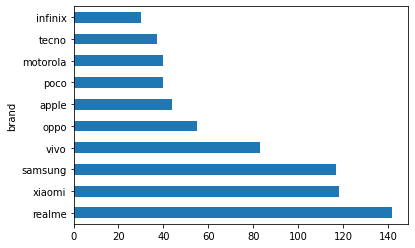

In [ ]:
df.groupby('brand')['name'].count().sort_values(ascending = False).head(10).plot(kind = 'barh')

In [ ]:
df['brand'].isnull().sum()

0

#Price

Conclusion


*   Data is positivly skew
*   Outliers are present in data (because of brands like apple) 
*   Most of the phones have price below 25000
*   Huawei Mate 50 RS Porsche Design this phone is an outlier its price is too high because of its design and not because of any other mobile specification so we will not consider this phone



In [ ]:
df['price'].describe()

count       856.000000
mean      24322.889019
std       27225.342181
min        3490.000000
25%       10490.000000
50%       14999.000000
75%       25990.000000
max      239999.000000
Name: price, dtype: float64

outliers treatment in price column

In [ ]:
df[df['price']>200000]

,img,name,brand,price,spec_scpre,version,5G,NFC,IR_blaster,total_sim,ram,rom,battery_cap,fast_charging,screen_size,resolution,refresh_rate,display_type,num_rear_camera,primary_rear_camera,num_front_camera,primary_front_camera,memmory_extenion,memmory_support_10,processor_brand,processor_name,core,clock_speed
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
353,https://cdn1.smartprix.com/rx-i9MJfNumf-w280-h...,Huawei Mate 50 RS Porsche Design,huawei,239999,81,Hongmeng OS v3.0,0,1,1,2,12,512,4700,66,6.74,1212 x 2616,120.0,Display,3,50.0,1,13.0,256,1,snapdragon,Snapdragon 8+ Gen1,Octa Core,3.2 GHz Processor


Huawei Mate 50 RS Porsche Design this phone is an outlier its price is too high because of its design and not because of any other mobile specification so we will not consider this phone

In [ ]:
df = df[df['price']<200000]
df['price'].isnull().sum()

0

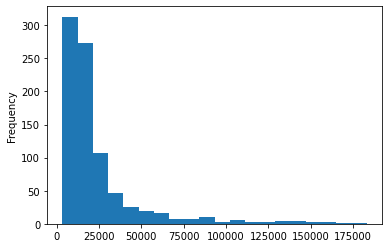

In [ ]:
df['price'].plot(kind = 'hist', bins = 20)

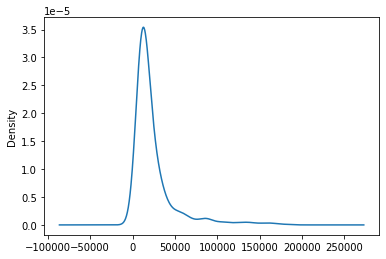

In [ ]:
df['price'].plot(kind = 'kde')

In [ ]:
df['price'].skew()

3.095525394854717

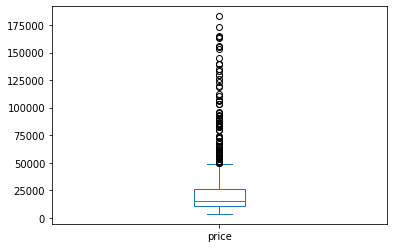

In [ ]:
df['price'].plot(kind = 'box')

#Spec_score
Conclusion


*   Data is almost normally distributed
*   9% of data is missing
*   Because this column depends upon almost all the other column we will fill missing values of this column using knn imputer



In [ ]:
df['spec_scpre'] = df['spec_scpre'].astype(float)
df['spec_scpre'].describe()

count    775.000000
mean      75.905806
std        8.064511
min       60.000000
25%       70.000000
50%       77.000000
75%       82.000000
max       89.000000
Name: spec_scpre, dtype: float64

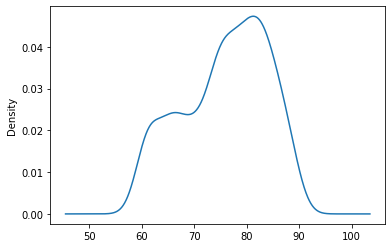

In [ ]:
df['spec_scpre'].plot(kind = 'kde')

In [ ]:
df['spec_scpre'].skew()

-0.37111389947365586

In [ ]:
df['spec_scpre'].isna().sum()/df.shape[0]*100

9.35672514619883

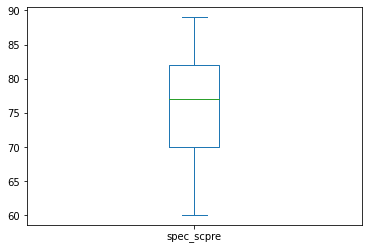

In [ ]:
df['spec_scpre'].plot(kind = 'box')

In [ ]:
df.head()

,img,name,brand,price,spec_scpre,version,5G,NFC,IR_blaster,total_sim,ram,rom,battery_cap,fast_charging,screen_size,resolution,refresh_rate,display_type,num_rear_camera,primary_rear_camera,num_front_camera,primary_front_camera,memmory_extenion,memmory_support_10,processor_brand,processor_name,core,clock_speed
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,https://cdn1.smartprix.com/rx-iGNlyOFEo-w280-h...,OnePlus Nord CE 2 Lite,oneplus,18999,81.0,Android v12,1,0,0,2,6,128,5000,33,6.59,1080 x 2412,120.0,Punch Hole,3,64.0,1,16.0,1,1,snapdragon,Snapdragon 695,Octa Core,2.2 GHz Processor
3,https://cdn1.smartprix.com/rx-iCDx5JIUn-w280-h...,Motorola Moto G62,motorola,14999,81.0,Android v12,1,0,0,2,6,128,5000,0,6.55,1080 x 2400,120.0,Punch Hole,3,50.0,1,16.0,1,1,snapdragon,Snapdragon 695,Octa Core,2.2 GHz Processor
4,https://cdn1.smartprix.com/rx-iKWyXqzam-w280-h...,Realme 10 Pro Plus,realme,24999,82.0,Android v13,1,0,0,2,6,128,5000,67,6.70,1080 x 2412,120.0,Punch Hole,3,108.0,1,16.0,NaN,0,dimensity,Dimensity 1080,Octa Core,2.6 GHz Processor
5,https://cdn1.smartprix.com/rx-ixLSVBm6G-w280-h...,Samsung Galaxy A14,samsung,16499,75.0,Android v13,1,0,0,2,4,64,5000,15,6.60,1080 x 2408,90.0,Water Drop Notch,3,50.0,1,13.0,1,1,exynos,Exynos 1330,Octa Core,2.4 GHz Processor
6,https://cdn1.smartprix.com/rx-iVyp4t2Vm-w280-h...,Apple iPhone 14,apple,72990,81.0,iOS v16,1,1,0,2,6,128,3279,0,6.10,1170 x 2532,NaN,Small Notch,2,12.0,1,12.0,NaN,0,bionic,Bionic A15,Hexa Core,3.22 GHz Processor


#Version
*  94%  of the mobile phones have os android
*  only 1 phone has different os so we will remove them
*  since all the phones version that have missing values have operating system android we will fill them with android

In [ ]:
df['version'].isna().sum()

7

In [ ]:
def version_cat(name):

  if 'Android' in name:
    return 'Android'
  elif 'iOS' in name:
    return 'iOS'
  else:
    return 'Others'

os = df[~df['version'].isna()]['version'].apply(version_cat)
df.loc[os.index, 'version'] = os.values

In [ ]:
df['version'].value_counts()

Android    803
iOS         44
Others       1
Name: version, dtype: int64

In [ ]:
#Removing phone whos os is Others
df = df[df['version'] != 'Others']

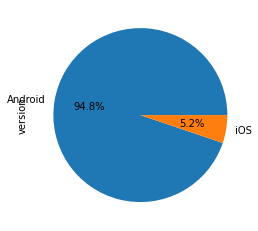

In [ ]:
df['version'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [ ]:
df['version'].isnull().sum()

7

In [ ]:
df[df['version'].isna()]

,img,name,brand,price,spec_scpre,version,5G,NFC,IR_blaster,total_sim,ram,rom,battery_cap,fast_charging,screen_size,resolution,refresh_rate,display_type,num_rear_camera,primary_rear_camera,num_front_camera,primary_front_camera,memmory_extenion,memmory_support_10,processor_brand,processor_name,core,clock_speed
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
282,https://cdn1.smartprix.com/rx-ic5ZRBSCH-w280-h...,Samsung Galaxy Z Flip 3,samsung,69999,84.0,NaN,1,1,0,1,8,128,3300,15,6.7,1080 x 2640,120.0,Punch Hole,2,12.0,1,10.0,NaN,0,snapdragon,Snapdragon 888,Octa Core,2.84 GHz Processor
367,https://cdn1.smartprix.com/rx-inDxN8gvS-w280-h...,Samsung Galaxy Z Flip 4,samsung,89999,88.0,NaN,1,1,0,2,8,128,3700,25,6.7,1080 x 2640,120.0,Punch Hole,2,12.0,1,10.0,NaN,0,snapdragon,Snapdragon 8+ Gen1,Octa Core,3.2 GHz Processor
398,https://cdn1.smartprix.com/rx-iTf1beb0F-w280-h...,LG Wing,lg,54999,89.0,NaN,1,1,0,2,8,128,4000,0,6.8,1080 x 2460,NaN,Display,3,64.0,1,32.0,2,1,snapdragon,Snapdragon 765G,Octa Core,2.4 GHz Processor
711,https://cdn1.smartprix.com/rx-iqsXvT6tp-w280-h...,Samsung Galaxy Z Flip 4,samsung,94999,88.0,NaN,1,1,0,2,8,256,3700,25,6.7,1080 x 2640,120.0,Punch Hole,2,12.0,1,10.0,NaN,0,snapdragon,Snapdragon 8+ Gen1,Octa Core,3.2 GHz Processor
809,https://cdn1.smartprix.com/rx-izWd4rlzU-w280-h...,Samsung Galaxy Z Flip 3,samsung,88999,85.0,NaN,1,1,0,1,8,256,3300,15,6.7,1080 x 2640,120.0,Punch Hole,2,12.0,1,10.0,NaN,0,snapdragon,Snapdragon 888,Octa Core,2.84 GHz Processor
839,https://cdn1.smartprix.com/rx-igAvq7Z0m-w280-h...,Realme 6i,realme,12790,75.0,NaN,0,0,0,2,4,64,4300,30,6.5,1080 x 2400,90.0,Punch Hole,4,48.0,1,16.0,256,1,helio,Helio G90T,Octa Core,2.05 GHz Processor
932,https://cdn1.smartprix.com/rx-iptc97ljb-w280-h...,Realme 6i,realme,12790,76.0,NaN,0,0,0,2,6,64,4300,30,6.5,1080 x 2400,90.0,Punch Hole,4,48.0,1,16.0,256,1,helio,Helio G90T,Octa Core,2.05 GHz Processor


###since all the phones version that have missing values have operating system android we will fill them with android

In [ ]:
df['version'].fillna('Android', inplace = True)

In [ ]:
df['version'].isna().sum()

0

#5G 
35% phones are 5G inabled

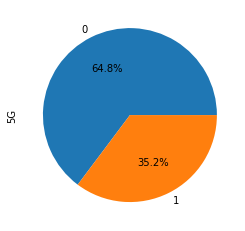

In [ ]:
df['5G'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [ ]:
df['5G'].isna().sum()

0

#NFC
26% phones have NFC technology

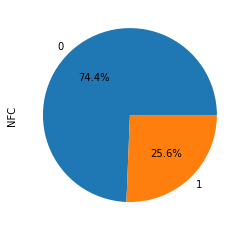

In [ ]:
df['NFC'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [ ]:
df['NFC'].isna().sum()

0

#IR_Blaster

* Only 14% phones have ir blaster and most of the chinese phones have ir_blaster feature

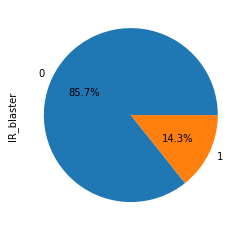

In [ ]:
df['IR_blaster'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [ ]:
df[df['IR_blaster'] == 1]['brand'].value_counts()

xiaomi    88
poco      31
iqoo       3
Name: brand, dtype: int64

In [ ]:
df['IR_blaster'].isna().sum()

0

#Total sim
Since 99% phones have dual sim, there is no point to keep this column for analysis.we will drop this column

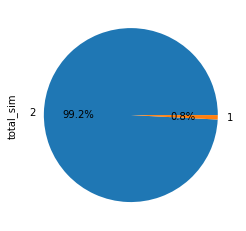

In [ ]:
df['total_sim'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [ ]:
df.drop('total_sim', axis = 1, inplace = True)

#Ram
*  80% of the phones in a market have ram 4,8 or6 GB

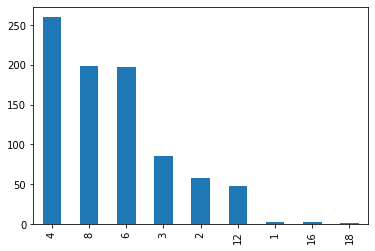

In [ ]:
df['ram'].value_counts().plot(kind = 'bar')

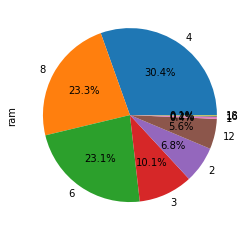

In [ ]:
df['ram'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [ ]:
df['ram'].isna().sum()

0

#Rom
*  42% of the phones in a market have a rom of 128 GB

*  There are phones in a market who are giving an option to extend internal storage upto 1024 gb

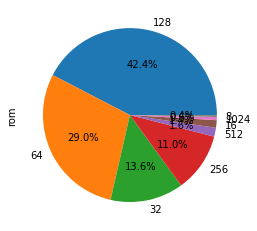

In [ ]:
df['rom'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [ ]:
df['rom'].isna().sum()

0

#Battery capacity
*  Data is almost normally distributed
*  Most of the phones have battery capacity between 4500 - 5000
*  Battery cap of iphone 12 series and SE  is missing so we will fill them with avg battcap of iphone 12 which is 2886 and for SE 2018

In [ ]:
df['battery_cap'] = df['battery_cap'].astype(float)

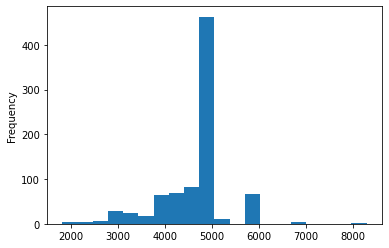

In [ ]:
df['battery_cap'].plot(kind = 'hist', bins = 20)

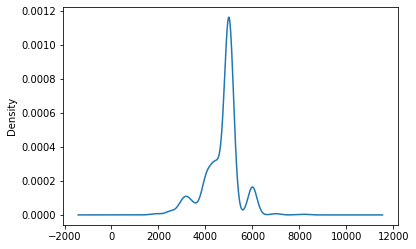

In [ ]:
df['battery_cap'].plot(kind = 'kde')

In [ ]:
df['battery_cap'].skew()

-0.5478116856756284

In [ ]:
df['battery_cap'].describe()

count     844.000000
mean     4729.606635
std       741.483075
min      1821.000000
25%      4400.000000
50%      5000.000000
75%      5000.000000
max      8300.000000
Name: battery_cap, dtype: float64

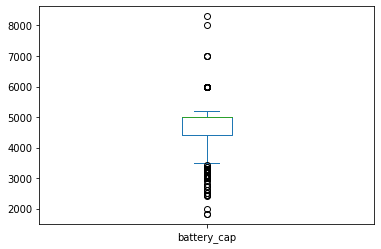

In [ ]:
df['battery_cap'].plot(kind = 'box')

In [ ]:
df[df['battery_cap']>8000]

,img,name,brand,price,spec_scpre,version,5G,NFC,IR_blaster,ram,rom,battery_cap,fast_charging,screen_size,resolution,refresh_rate,display_type,num_rear_camera,primary_rear_camera,num_front_camera,primary_front_camera,memmory_extenion,memmory_support_10,processor_brand,processor_name,core,clock_speed
index,,,,,,,,,,,,,,,,,,,,,,,,,,,
780,https://cdn1.smartprix.com/rx-iDcdiGJTs-w280-h...,Oukitel WP17,oukitel,38454,82.0,Android,0,1,0,8,256,8300.0,0,6.78,1080 x 2400,90.0,Punch Hole,3,64.0,1,16.0,NaN,1,helio,Helio G95,Octa Core,2 GHz Processor


In [ ]:
temp_df = df[df['brand'] == 'apple']
temp_df['name'] = temp_df['name'].str.strip()
temp_df[temp_df['battery_cap'].isna()]['name'].value_counts().sort_index()

<ipython-input-126-36cfcc8c31d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['name'] = temp_df['name'].str.strip()


Apple iPhone 12           3
Apple iPhone 12 Mini      3
Apple iPhone 12 Pro       1
Apple iPhone SE 3 2022    3
Name: name, dtype: int64

In [ ]:
temp_df.groupby('name')['battery_cap'].mean()

name
Apple iPhone 11            3110.0
Apple iPhone 11 Pro        3190.0
Apple iPhone 11 Pro Max    3500.0
Apple iPhone 12               NaN
Apple iPhone 12 Mini          NaN
Apple iPhone 12 Pro           NaN
Apple iPhone 13            3240.0
Apple iPhone 13 Mini       2438.0
Apple iPhone 13 Pro        3095.0
Apple iPhone 13 Pro Max    4352.0
Apple iPhone 14            3279.0
Apple iPhone 14 Plus       4325.0
Apple iPhone 14 Pro        3200.0
Apple iPhone 14 Pro Max    4323.0
Apple iPhone SE 2020       1821.0
Apple iPhone SE 3 2022        NaN
Name: battery_cap, dtype: float64

In [ ]:
#avg battery cap of ihone 12 series is 2886 and se has batt cap 2018
df['name'] = df['name'].str.strip()
index_ = df[df['name'].str.contains('Apple iPhone 12')].index
df.loc[index_, 'battery_cap'] = 2886

In [ ]:
index_ = df[df['battery_cap'].isna()].index
df.loc[index_, 'battery_cap'] = 2018

In [ ]:
df['battery_cap'].isna().sum()

0

#Fast charging
Data is positively skewed

Almost 74% of the phones in a market have fastcharging feature

Data has outliers but this outiers are really exists

In [ ]:
fastcharg_ava = df['fast_charging'].apply(lambda x:0 if x == -1 else 1 )
df.insert(12 , 'fastcharg_ava', fastcharg_ava)

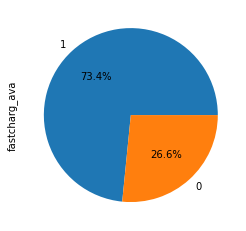

In [ ]:
df['fastcharg_ava'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [ ]:
df['fast_charging'] = df['fast_charging'].astype(int)
df[df['fast_charging']!=-1]['fast_charging'].describe()#plot(kind = 'hist', bins = 20)

count    627.000000
mean      32.070175
std       27.626876
min        0.000000
25%       18.000000
50%       25.000000
75%       33.000000
max      180.000000
Name: fast_charging, dtype: float64

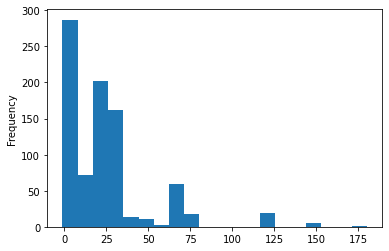

In [ ]:
df['fast_charging'].plot(kind = 'hist', bins = 20)

In [ ]:
df['fast_charging'].skew()

1.9605498436781978

In [ ]:
df[df['fast_charging'] == 180]

,img,name,brand,price,spec_scpre,version,5G,NFC,IR_blaster,ram,rom,battery_cap,fastcharg_ava,fast_charging,screen_size,resolution,refresh_rate,display_type,num_rear_camera,primary_rear_camera,num_front_camera,primary_front_camera,memmory_extenion,memmory_support_10,processor_brand,processor_name,core,clock_speed
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
122,https://cdn1.smartprix.com/rx-i9tenmg11-w280-h...,Infinix Zero Ultra,infinix,32999,89.0,Android,1,0,0,8,256,4500.0,1,180,6.8,1080 x 2400,120.0,Punch Hole,3,200.0,1,32.0,NaN,1,dimensity,Dimensity 920 5G,Octa Core,2.5 GHz Processor


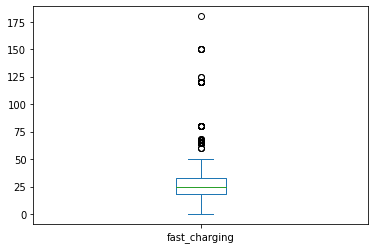

In [ ]:
df[df['fast_charging']!=-1]['fast_charging'].plot(kind = 'box')

In [ ]:
df['fast_charging'].isna().sum()

0

#Screen size
Data is negetively skewed

Data has outliers but thise values are real and can be use to distinguish the phones like samsung flip which has special feature of fliping screen,This will help in analysis 

In [ ]:
df['screen_size'].describe()

count    854.000000
mean       6.460246
std        0.346071
min        4.700000
25%        6.430000
50%        6.520000
75%        6.600000
max        7.600000
Name: screen_size, dtype: float64

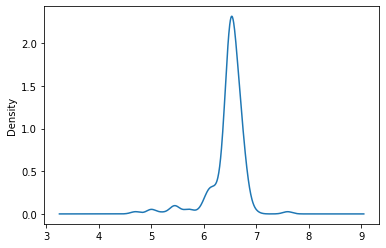

In [ ]:
df['screen_size'].plot(kind = 'kde')

In [ ]:
df['screen_size'].skew()

-2.299181645676743

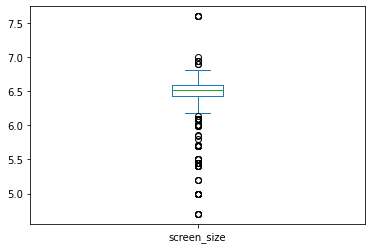

In [ ]:
df['screen_size'].plot(kind = 'box')

In [ ]:
df['screen_size'].isna().sum()

0

#Resolution
we can create new column of ppi using screen size and resolution 

In [ ]:
screen_width = df['resolution'].apply(lambda x: x.split('x')[0])
screen_height = df['resolution'].apply(lambda x: x.split('x')[1])

In [ ]:
df.insert(14, 'screen_width', screen_width)
df.insert(15, 'screen_height', screen_height)

###Refresh Rate
more than 50% values are absent in data

after checking all the models specification on google i found that refresh rate of all the phones who has a missing value in refresh rate column is 60Hz

In [ ]:
df['refresh_rate'].isna().sum()/df.shape[0]*100

52.459016393442624

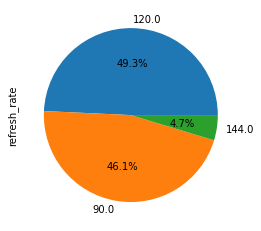

In [ ]:
df['refresh_rate'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [ ]:
pd.crosstab(df['refresh_rate'], df['brand'], normalize = 'columns')*100


brand,apple,asus,google,infinix,iqoo,lava,motorola,nokia,nothing,oneplus,oppo,oukitel,poco,realme,samsung,sony,tecno,vivo,xiaomi
refresh_rate,,,,,,,,,,,,,,,,,,,
90.0,0.0,0.0,50.0,60.0,13.043478,100.0,42.307692,75.0,0.0,15.384615,94.736842,100.0,46.153846,54.666667,40.298507,0.0,71.428571,66.666667,41.071429
120.0,100.0,0.0,50.0,40.0,78.260870,0.0,34.615385,25.0,100.0,84.615385,5.263158,0.0,53.846154,42.666667,59.701493,100.0,28.571429,33.333333,50.000000
144.0,0.0,100.0,0.0,0.0,8.695652,0.0,23.076923,0.0,0.0,0.000000,0.000000,0.0,0.000000,2.666667,0.000000,0.0,0.000000,0.000000,8.928571


In [ ]:
#df[df['refresh_rate'].isna()]['name'].value_counts()

since almost all the phones have reresh rate 60Hz we will fill missing values with 60 Hz

In [ ]:
df['refresh_rate'].fillna(60,inplace = True)

In [ ]:
df['refresh_rate'].isna().sum()

0

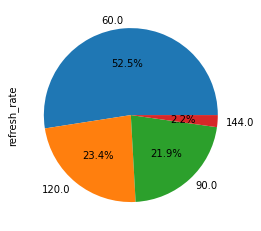

In [ ]:
df['refresh_rate'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

#Display Type
Most of the phones have display tipe either Punch Hole or Water Drop Notch

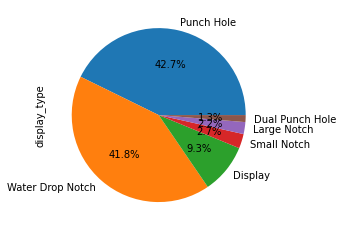

In [ ]:
df['display_type'] = df['display_type'].str.strip()
df['display_type'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [ ]:
df['display_type'].isna().sum()

0

#num_rear_camera
almost 47% mobile phones have 3 camera in the rear

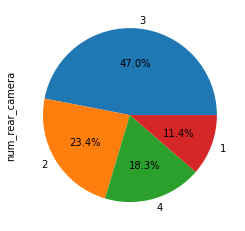

In [ ]:
df['num_rear_camera'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [ ]:
df['num_rear_camera'].isna().sum()

0

#primary_rear_camera
*  25% mobile has 50mp camera in rear

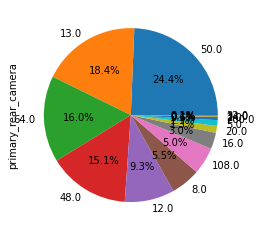

In [ ]:
df['primary_rear_camera'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [ ]:
df[df['primary_rear_camera'] == 200]

,img,name,brand,price,spec_scpre,version,5G,NFC,IR_blaster,ram,rom,battery_cap,fastcharg_ava,fast_charging,screen_width,screen_height,screen_size,resolution,refresh_rate,display_type,num_rear_camera,primary_rear_camera,num_front_camera,primary_front_camera,memmory_extenion,memmory_support_10,processor_brand,processor_name,core,clock_speed
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9,https://cdn1.smartprix.com/rx-icB47WnHZ-w280-h...,Xiaomi Redmi Note 12 Pro Plus,xiaomi,29999,86.0,Android,1,0,1,8,256,4980.0,1,120,1080,2400,6.67,1080 x 2400,120.0,Punch Hole,3,200.0,1,16.0,NaN,0,dimensity,Dimensity 1080,Octa Core,2.6 GHz Processor
55,https://cdn1.smartprix.com/rx-isLGEqE4K-w280-h...,Xiaomi Redmi Note 12 Pro Plus,xiaomi,32999,87.0,Android,1,0,1,12,256,4980.0,1,120,1080,2400,6.67,1080 x 2400,120.0,Punch Hole,3,200.0,1,16.0,NaN,0,dimensity,Dimensity 1080,Octa Core,2.6 GHz Processor
122,https://cdn1.smartprix.com/rx-i9tenmg11-w280-h...,Infinix Zero Ultra,infinix,32999,89.0,Android,1,0,0,8,256,4500.0,1,180,1080,2400,6.80,1080 x 2400,120.0,Punch Hole,3,200.0,1,32.0,NaN,1,dimensity,Dimensity 920 5G,Octa Core,2.5 GHz Processor
153,https://cdn1.smartprix.com/rx-iQEv12bkR-w280-h...,Motorola Edge 30 Ultra,motorola,53999,NaN,Android,1,1,0,8,128,4610.0,1,125,1080,2400,6.67,1080 x 2400,144.0,Punch Hole,3,200.0,1,60.0,NaN,0,snapdragon,Snapdragon 8+ Gen1,Octa Core,3.2 GHz Processor
207,https://cdn1.smartprix.com/rx-iFeZKQDFl-w280-h...,Motorola Edge 30 Ultra,motorola,59999,NaN,Android,1,1,0,12,256,4610.0,1,125,1080,2400,6.67,1080 x 2400,144.0,Punch Hole,3,200.0,1,60.0,NaN,0,snapdragon,Snapdragon 8+ Gen1,Octa Core,3.2 GHz Processor


In [ ]:
df['primary_rear_camera'].isna().sum()

0

#num_front_camera
* 97% phones have single camera at front 

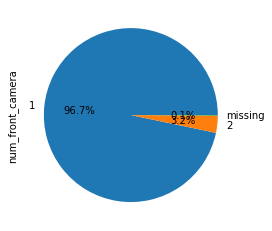

In [ ]:
df['num_front_camera'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [ ]:
df['num_front_camera'] = df['num_front_camera'].replace('missing', 0).astype(int)
df['num_front_camera'].value_counts()

1    826
2     27
0      1
Name: num_front_camera, dtype: int64

#primary_front_camera
most of the phones have front camera of 16, 8 and 5 mega pixle

one missing value itel A23s as it does not have front camera so we will replave nan with 0

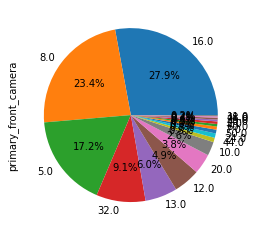

In [ ]:
df['primary_front_camera'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [ ]:
df['primary_front_camera'].value_counts()

16.0    238
8.0     200
5.0     147
32.0     78
13.0     51
12.0     42
20.0     32
10.0     22
44.0      7
24.0      7
50.0      6
7.0       5
60.0      4
2.0       4
40.0      3
25.0      3
48.0      2
11.0      2
Name: primary_front_camera, dtype: int64

In [ ]:
df['primary_front_camera'].fillna(0, inplace =True)
df['primary_front_camera'].isna().sum()

0

#memmory_extenion
 

*   almost 32% of data is missing
*   in missing data some phones do not have memmory slot and some phones have.
*   so phoens who have memmory slot need to be fill with proper value using knn imputer
*   and remaining will be zero
*   after performing above steps missing values are 8%



In [ ]:
df['memmory_extenion'] = df['memmory_extenion'].astype(float)

In [ ]:
df['memmory_extenion'] = df['memmory_extenion'].replace(1, 1024).replace(2, 2048)

In [ ]:
df['memmory_extenion'].value_counts()

1024.0    212
256.0     183
512.0     135
128.0      28
2048.0      8
64.0        8
32.0        2
400.0       1
Name: memmory_extenion, dtype: int64

In [ ]:
df['memmory_extenion'].isna().sum()/df.shape[0]*100

32.43559718969556

In [ ]:
#replacing missing values with zero where memmory support is not available
temp_df1 = df[df['memmory_extenion'].isna()]
index_ = temp_df1[temp_df1['memmory_support_10'] == 0].index
df.loc[index_, 'memmory_extenion'] = 0

In [ ]:
df[df['name'] == 'Xiaomi Mi 11 Lite NE']

,img,name,brand,price,spec_scpre,version,5G,NFC,IR_blaster,ram,rom,battery_cap,fastcharg_ava,fast_charging,screen_width,screen_height,screen_size,resolution,refresh_rate,display_type,num_rear_camera,primary_rear_camera,num_front_camera,primary_front_camera,memmory_extenion,memmory_support_10,processor_brand,processor_name,core,clock_speed
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
233,https://cdn1.smartprix.com/rx-ieLXKpqf2-w280-h...,Xiaomi Mi 11 Lite NE,xiaomi,21890,83.0,Android,1,1,1,6,128,4250.0,1,33,1080,2400,6.55,1080 x 2400,90.0,Punch Hole,3,64.0,1,20.0,NaN,1,snapdragon,Snapdragon 778G,Octa Core,2.4 GHz Processor
360,https://cdn1.smartprix.com/rx-iMbNArKNS-w280-h...,Xiaomi Mi 11 Lite NE,xiaomi,23990,86.0,Android,1,1,1,8,128,4250.0,1,33,1080,2400,6.55,1080 x 2400,90.0,Punch Hole,3,64.0,1,20.0,NaN,1,snapdragon,Snapdragon 778G,Octa Core,2.4 GHz Processor


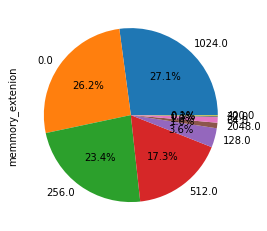

In [ ]:
df['memmory_extenion'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

#memmory_support_10

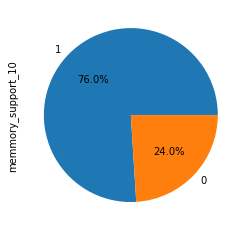

In [ ]:
df['memmory_support_10'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [ ]:
df['memmory_support_10'].isna().sum()

0

#processor_brand
*  Most of the processor brands in a phone are snapdragaon and mediatek
*  3.3% of data is missing
*  after researching on google i found that, all the phones that have missing values in processor brand  are using mediatek 
processor except itel and apple who is using unisoc and bionic respectively

In [ ]:
df['processor_brand'].value_counts()

snapdragon    301
helio         256
dimensity     105
exynos         44
bionic         38
unisoc         32
tiger          20
qualcomm        7
google          6
spreadtrum      6
a13             4
sc9863a         3
kirin           1
sprd            1
mt              1
Name: processor_brand, dtype: int64

In [ ]:
def processor_name(name):
  if name == 'qualcomm':
    return 'snapdragon'
  elif name == 'tiger' or name == 'sc9863a' or name == 'sprd' or name == 'spreadtrum':
    return 'unisoc'
  elif name == 'a13':
    return 'bionic'
  elif name == 'mt' or name == 'helio' or name == 'dimensity':
    return 'mediatek'
  else:
    return name 

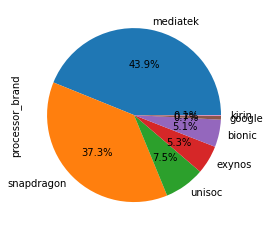

In [ ]:
df['processor_brand'].apply(processor_name).value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [ ]:
df['processor_brand'].isna().sum()/df.shape[0]*100

3.395784543325527

In [ ]:
df['processor_brand'].isna().sum()

29

In [ ]:
df[df['processor_brand'].isna()]['name'].value_counts()

Samsung Galaxy A13                3
Apple iPhone SE 2020              2
iKall Z13                         1
iKall Z2                          1
iKall Z11                         1
iKall K470 New                    1
Micromax Canvas Xpress 4G Q413    1
itel A48                          1
Lava Z21                          1
iKall Z6 Pro                      1
iKall Z10 New                     1
iKall K475 New                    1
iKall K401 Pro                    1
iKall K350 New                    1
iKall Z20                         1
Tecno Spark Go 2021               1
itel A49                          1
iKall Z12                         1
iKall Z14                         1
iKall Z15                         1
iKall Z17                         1
iKall K401 New                    1
iKall Z18                         1
iKall Z19                         1
Tecno Spark Go 2022               1
Lava Z61 Pro                      1
Name: name, dtype: int64

after researching on google i found that, all the phones are using mediatek 
processor except itel, it is using unisoc processor

In [ ]:
temp_df2 = df[df['processor_brand'].isna()]

def pbrand_fillna(name):
  if name == 'itel':
    return 'unisoc'
  elif name == 'apple':
    return 'bionic'
  else:
    return 'mediatek'

temp_df2['brand'] = temp_df2['brand'].apply(pbrand_fillna)
df.loc[temp_df2.index, 'processor_brand'] = np.array(temp_df2['brand'])

<ipython-input-180-716bde947227>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df2['brand'] = temp_df2['brand'].apply(pbrand_fillna)


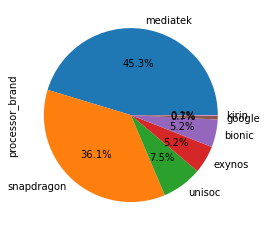

In [ ]:
df['processor_brand'].apply(processor_name).value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [ ]:
df['processor_brand'].isna().sum()

0

#Core
*  Most of the phones have octa core processor
*  Missing values are present in a data we will fill them with knn imputation 

In [ ]:
df['core'] = df['core'].replace('Octa Core', 8).replace('Quad Core', 4).replace('Hexa Core', 6)

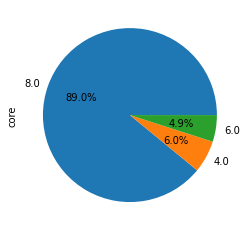

In [ ]:
df['core'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [ ]:
df[df['core'].isna()]

,img,name,brand,price,spec_scpre,version,5G,NFC,IR_blaster,ram,rom,battery_cap,fastcharg_ava,fast_charging,screen_width,screen_height,screen_size,resolution,refresh_rate,display_type,num_rear_camera,primary_rear_camera,num_front_camera,primary_front_camera,memmory_extenion,memmory_support_10,processor_brand,processor_name,core,clock_speed
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
415,https://cdn1.smartprix.com/rx-iSMRBV6qx-w280-h...,Apple iPhone SE 2020,apple,28990,63.0,iOS,0,1,0,3,64,1821.0,1,18,750,1334,4.70,750 x 1334,60.0,Display,1,12.0,1,7.0,0.0,0,bionic,NaN,NaN,NaN
604,https://cdn1.smartprix.com/rx-iDietlFCU-w280-h...,Apple iPhone SE 2020,apple,32990,65.0,iOS,0,1,0,3,128,1821.0,1,18,750,1334,4.70,750 x 1334,60.0,Display,1,12.0,1,7.0,0.0,0,bionic,NaN,NaN,NaN
617,https://cdn1.smartprix.com/rx-iLITT45qt-w280-h...,Lava Yuva Pro,lava,7798,NaN,Android,0,0,0,3,32,5000.0,1,10,1600,720,6.52,1600 x 720,60.0,Water Drop Notch,3,13.0,1,8.0,512.0,1,helio,Helio,NaN,NaN
796,https://cdn1.smartprix.com/rx-iIA8BF73i-w280-h...,Lava Z21,lava,5299,NaN,Android,0,0,0,2,32,3100.0,0,-1,480,854,5.00,480 x 854,60.0,Display,1,5.0,1,2.0,256.0,1,mediatek,NaN,NaN,NaN
798,https://cdn1.smartprix.com/rx-ia9MNU3lX-w280-h...,itel A27,itel,5195,NaN,Android,0,0,0,2,32,4000.0,0,-1,480,960,5.45,480 x 960,60.0,Display,1,5.0,1,2.0,0.0,0,sprd,Sprd 9832e,NaN,NaN


#clock_speed
*  outliers are present in a data(this mainly includes iphone whos clock speed is greater rhan 3)
*  Most of the phones have clock speed between 2 - 2.4

In [ ]:
df['clock_speed'] = df['clock_speed'].str.replace(' GHz Processor', '').str.strip().astype(float)

In [ ]:
df['clock_speed'].describe()

count    837.000000
mean       2.269415
std        0.445402
min        1.000000
25%        2.000000
50%        2.200000
75%        2.400000
max        3.220000
Name: clock_speed, dtype: float64

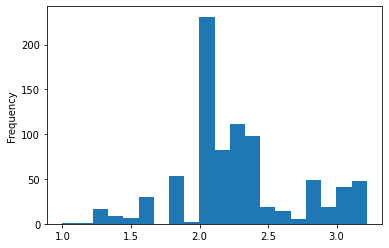

In [ ]:
df['clock_speed'].plot(kind = 'hist', bins = 20)

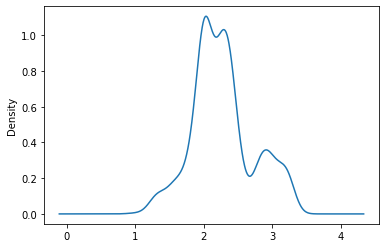

In [ ]:
df['clock_speed'].plot(kind = 'kde')

In [ ]:
df['clock_speed'].skew()

0.36088076215039233

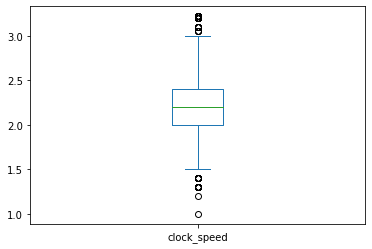

In [ ]:
df['clock_speed'].plot(kind = 'box')

In [ ]:
df[df['clock_speed']>3.0]['brand'].value_counts()

apple       30
iqoo         6
samsung      5
realme       4
oneplus      3
poco         3
tecno        2
motorola     2
xiaomi       2
vivo         2
Name: brand, dtype: int64

#Conclusions from univariate analysis

*  realme, xiaomi, samsung, vivo and oppo have more than 50 products in the market
*  Most of the phones have price below 25000
*  94%  of the mobile phones have os android
*  35% phones are 5G inabled
*  26% phones have NFC technology
* Only 14% phones have ir blaster and most of the chinese phones have ir_blaster feature
*  80% of the phones in a market have ram 4,8 or6 GB
*  42% of the phones in a market have a rom of 128 GB
*  Most of the phones have battery capacity between 4500 - 5000
*  Almost 74% of the phones in a market have fastcharging feature
*  More than 50% of the phones have refresh rate 60Hz
*  Most of the phones have display tipe either Punch Hole or Water Drop Notch
*  Almost 47% mobile phones have 3 camera in the rear
*  25% mobile has 50mp camera in rear
*  most of the phones have front camera of 16, 8 and 5 mega pixle
*  Most of the processor brands in a phone are snapdragaon and mediatek
*  90% of the phones have octa core processor
*  Most of the phones have clock speed between 2 - 2.4

#Bivariate analysis

Lets create a heatmap and see how our output column(i.e price) is corelated with other column

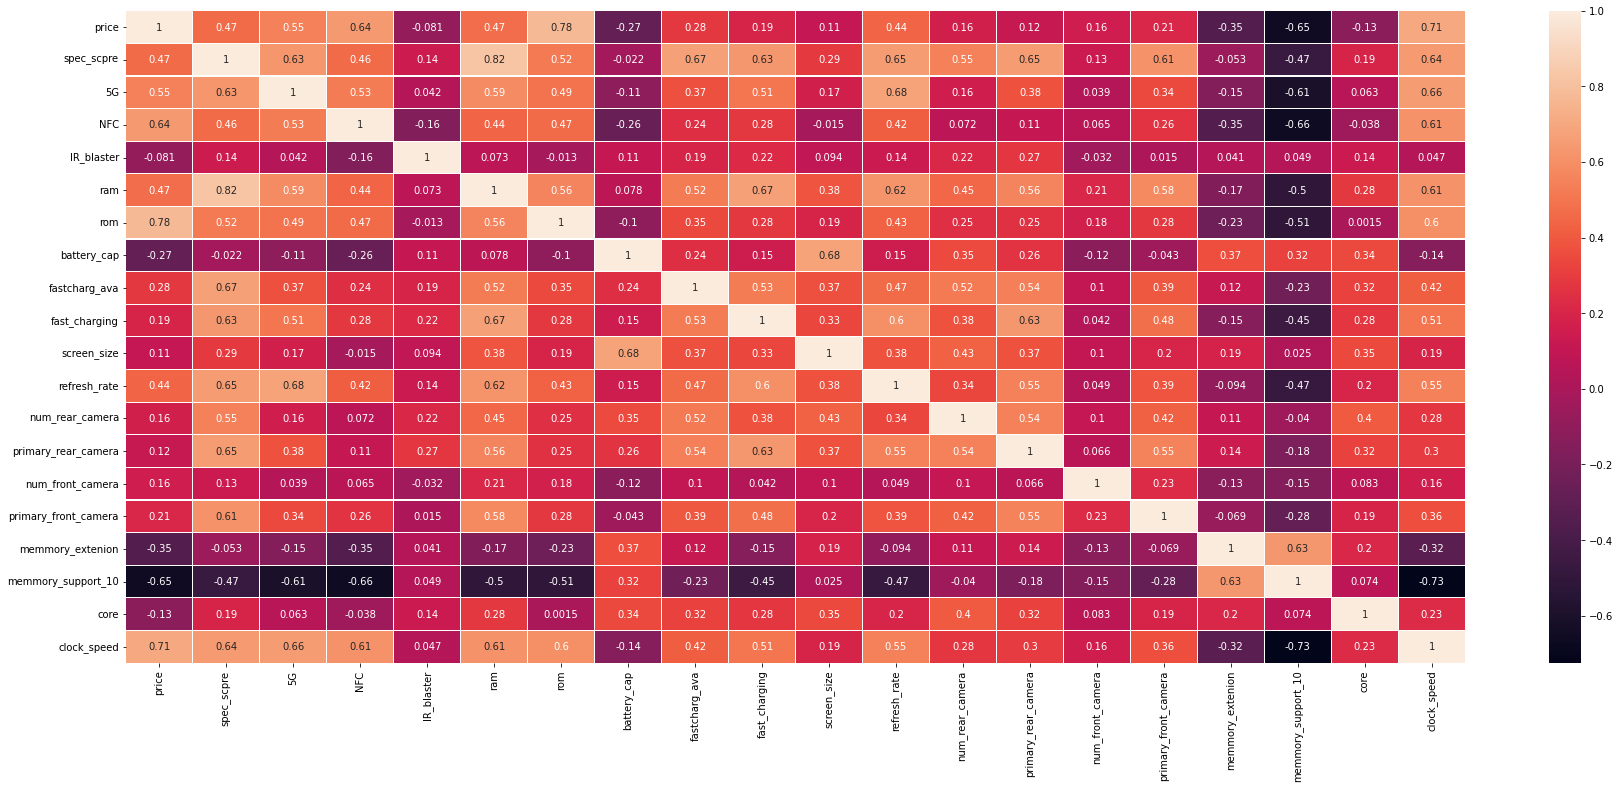

In [ ]:
plt.figure(figsize = (30,12))
sns.heatmap(df.corr(), annot = True, linewidths = 0.1 )

##Price and spec_score
*  we can see that all the high end phones and phones which have price more than average have spec_score above 74
*  and all the phones abovr spec_score 85 have price more than 25000(avg price)

> Indented block



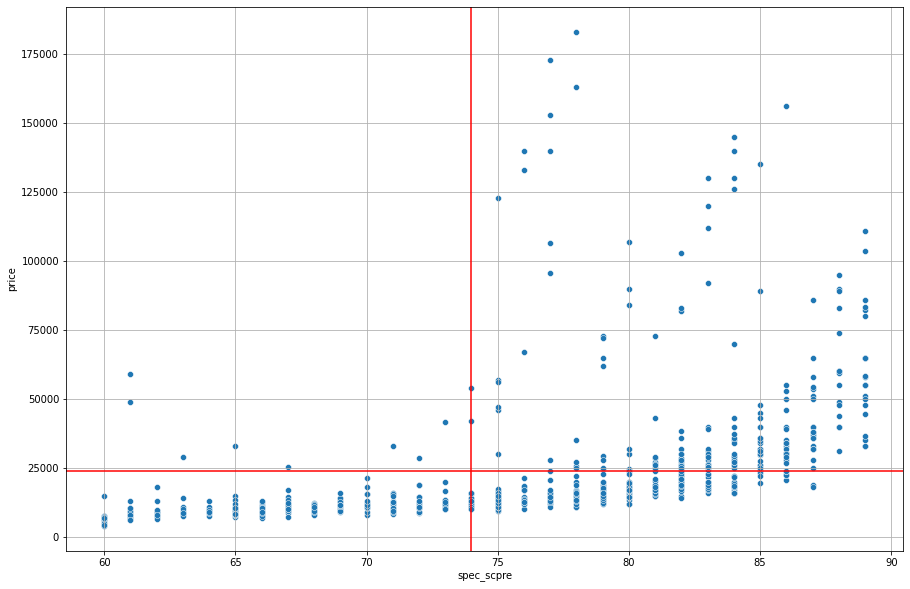

In [ ]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = df, x = 'spec_scpre', y = 'price')
plt.axhline(y = df['price'].mean(), color = 'red')
plt.axvline(x = 74, color = 'red')
plt.grid()

In [ ]:
df['price'].mean()

24027.453161592504

##Price and 5G
*  we can see that phones that supporting 5G are costlier and have a avg price of 40000

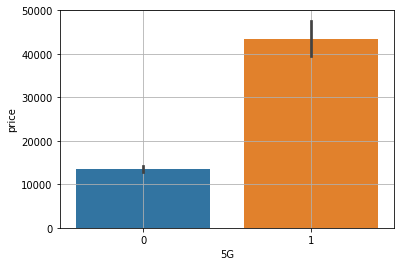

In [ ]:
sns.barplot(data = df, x = '5G', y = 'price')
plt.grid()

##Price and NFC
Phones which has NFC support have avg price more than 50000which is higher than 5G phones

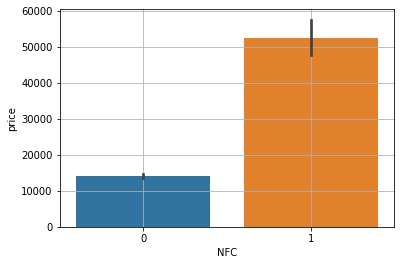

In [ ]:
sns.barplot(data = df, x = 'NFC', y = 'price')
plt.grid()

#Price and RAM 
*  Price is higly dependent on RAM.As RAM increases price of the phone also increses
*  Phones having ram 6 or more than 6 have avg price above 25000

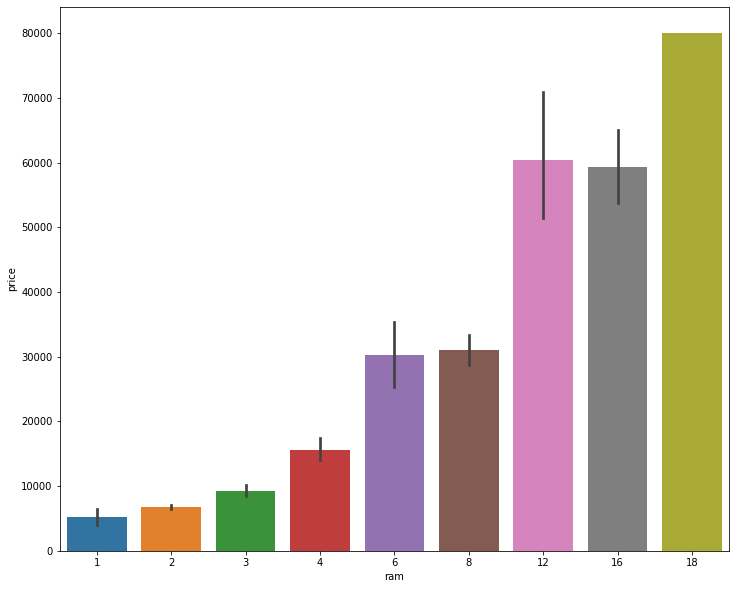

In [ ]:
plt.figure(figsize = (12,10))
sns.barplot(data = df, x = 'ram', y = 'price')

#Price and ROM
* As ROM increses price increses
* Mobile phones having rom 256 or above 256 are higher end phones and their avg price is more than 50k

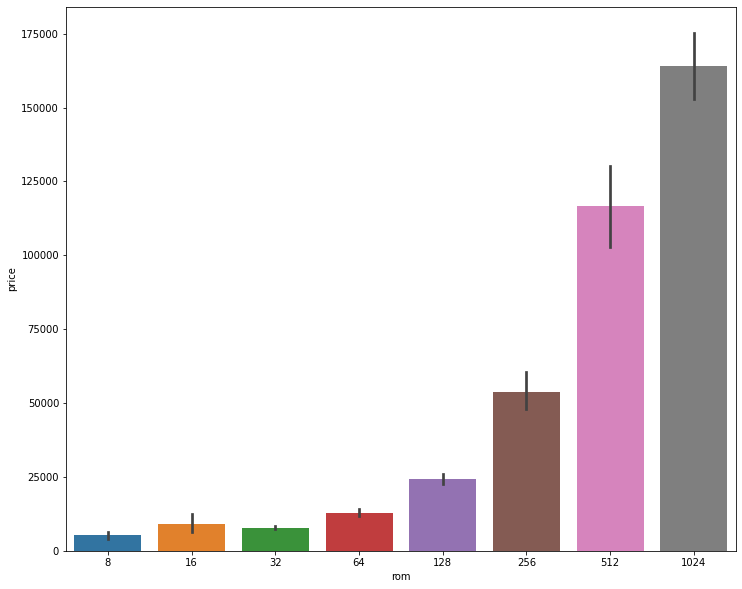

In [ ]:
plt.figure(figsize = (12,10))
sns.barplot(data = df, x = 'rom', y = 'price')

##Price and fast charging
*  Having fast charging tech puts mobilr price bit higer side

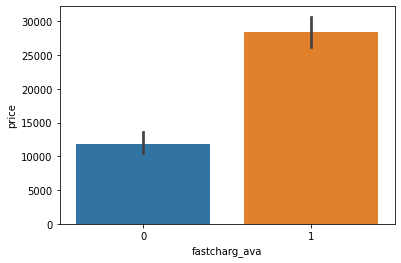

In [ ]:

sns.barplot(data = df, x = 'fastcharg_ava', y = 'price')

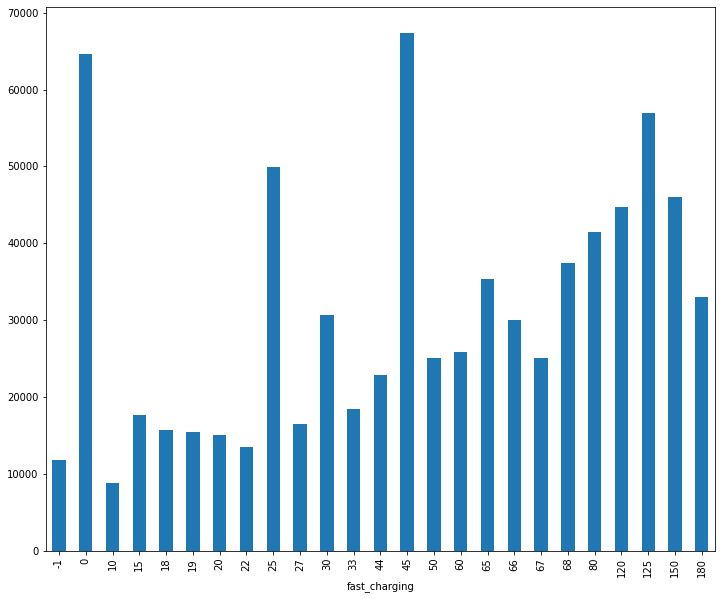

In [ ]:
plt.figure(figsize = (12,10))
df.groupby('fast_charging')['price'].mean().plot(kind = 'bar')

##Price and refresh rate 
higer end phones have refresh rate more than 90

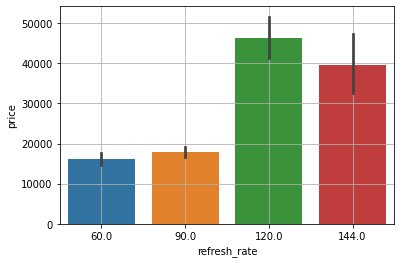

In [ ]:
sns.barplot(data = df, x = 'refresh_rate', y = 'price')
plt.grid()

##Price and camera 
seems like price does not depend much on camera mp

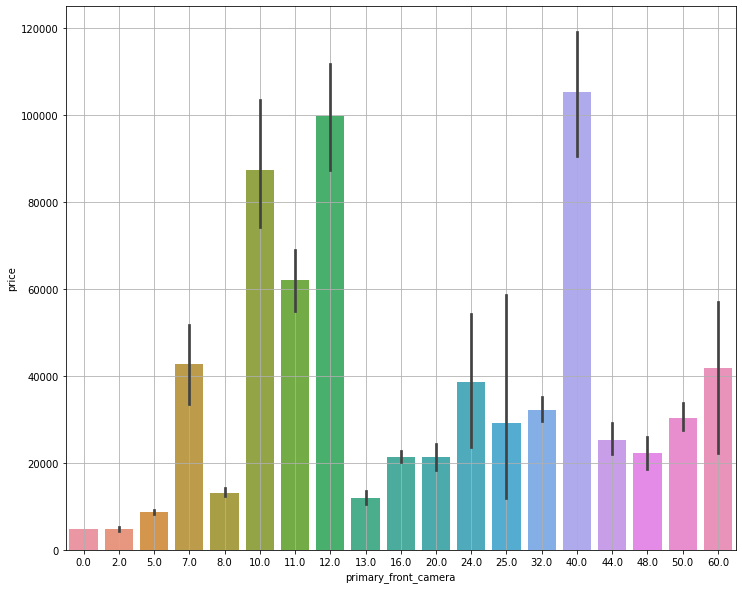

In [ ]:
plt.figure(figsize = (12,10))
sns.barplot(data = df, x = 'primary_front_camera', y = 'price')
plt.grid()

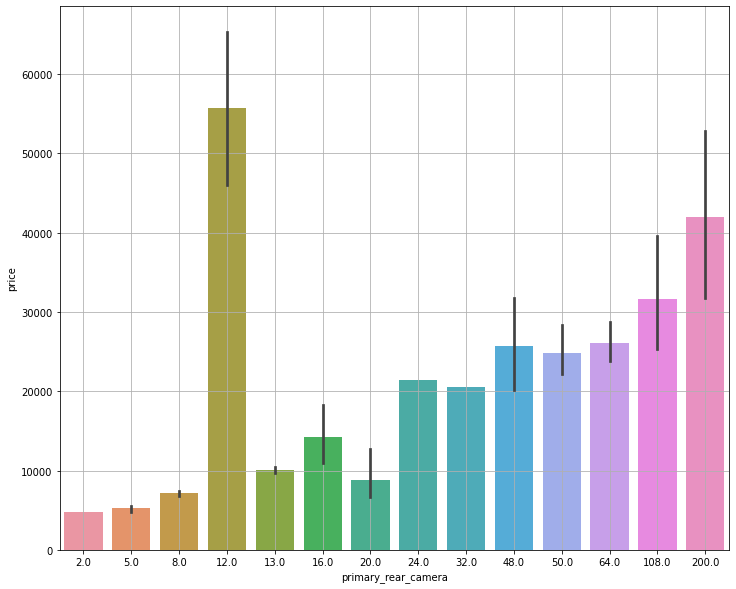

In [ ]:
plt.figure(figsize = (12,10))
sns.barplot(data = df, x = 'primary_rear_camera', y = 'price')
plt.grid()

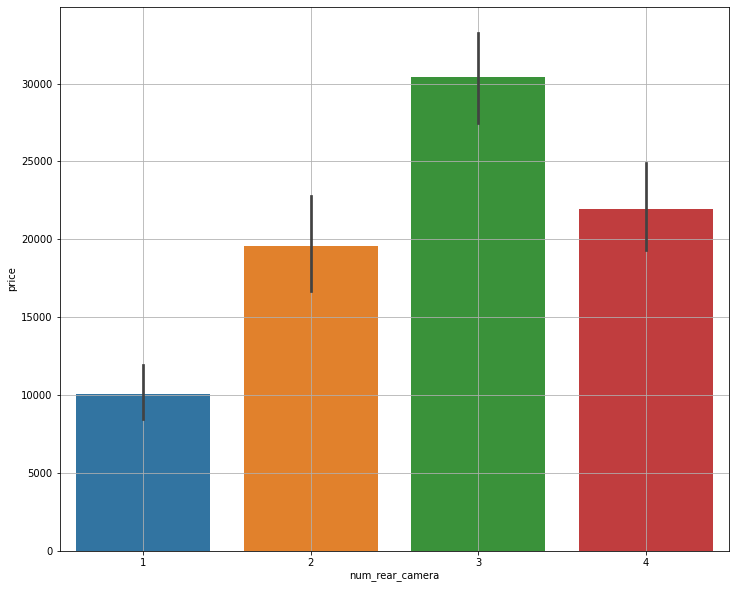

In [ ]:
plt.figure(figsize = (12,10))
sns.barplot(data = df, x = 'num_rear_camera', y = 'price')
plt.grid()

#Price and memmory_support_10
Apperently phone which does not have memory extention are higher end phones(may be becaause of iphone)

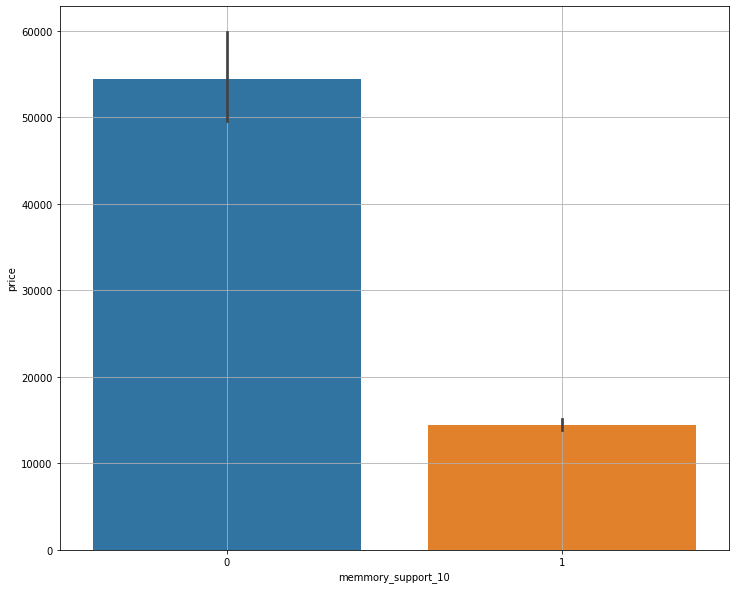

In [ ]:
plt.figure(figsize = (12,10))
sns.barplot(data = df, x = 'memmory_support_10', y = 'price')
plt.grid()

#Price and clock speed
Phones having clock speed above 2.5 have average price more than 20k

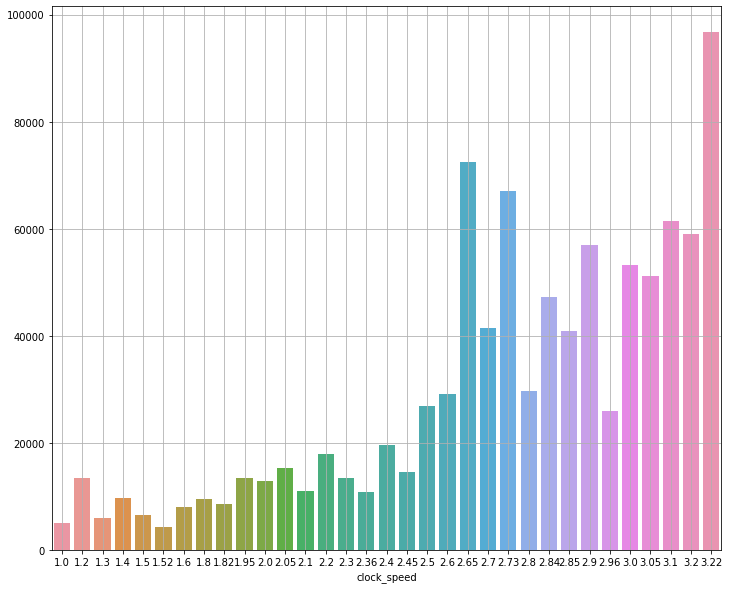

In [ ]:
plt.figure(figsize = (12,10))
temp = df.groupby('clock_speed')['price'].mean()
sns.barplot(data = df, x = temp.index, y = temp.values)
plt.grid()

#Price and brand

apple, sony has very high avg price (above 80000)


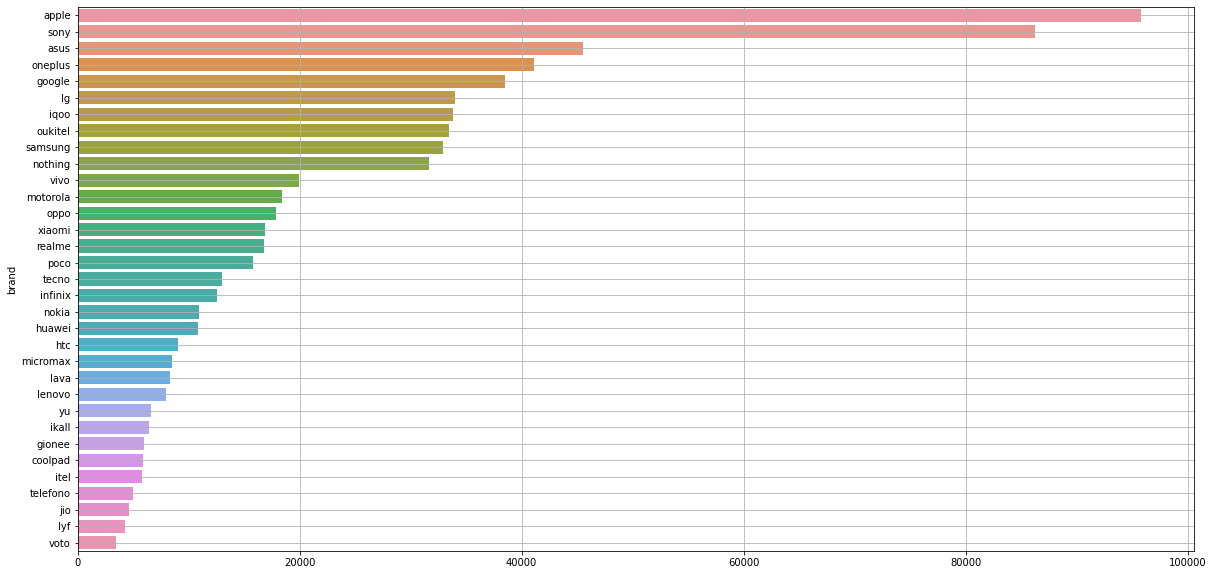

In [ ]:
plt.figure(figsize = (20,10))
temp_series = df.groupby('brand')['price'].mean().sort_values(ascending = False)
sns.barplot( x = temp_series.values, y = temp_series.index, orient='h')
plt.grid()

##Price and display type
small notch and large notch display type have avg price more than 60k

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

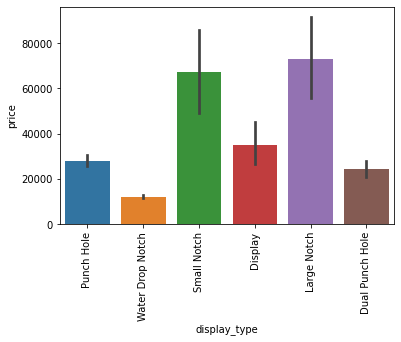

In [ ]:
sns.barplot(data = df, x = 'display_type', y = 'price')
plt.xticks(rotation = 'vertical')

##Price and processor brand

mobile phone which has the processor of bionic and google are highr end phones 

budget phones have processor of kirin, unisoc or mediatek

In [ ]:
df['processor_brand1'] = df['processor_brand'].apply(processor_name)

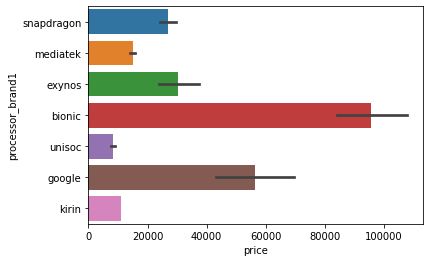

In [ ]:
sns.barplot(data = df, x = 'price', y = 'processor_brand1', orient = 'h')

#Conclusions from bivariate analysis
*  we can see that all the high end phones and phones which have price more than average have spec_score above 74
*  and all the phones abovr spec_score 85 have price more than 25000(avg price)
*  we can see that phones that supporting 5G are costlier and have a avg price of 40000
*  Phones which has NFC support have avg price more than 50000which is higher than 5G phones
*  Price is higly dependent on RAM.As RAM increases price of the phone also increses
*  Phones having ram 6 or more than 6 have avg price above 25000
* As ROM increses price increses
* Mobile phones having rom 256 or above 256 are higher end phones and their avg price is more than 50k
*  Having fast charging tech puts mobilr price bit higer side
*higer end phones have refresh rate more than 90
*  Phones having clock speed above 2.5 have average price more than 20k
*  apple, sony has very high avg price (above 80000)
*  small notch and large notch display type have avg price more than 60k
*  mobile phone which has the processor of bionic and google are highr end phones 
*  budget phones have processor of kirin, unisoc or mediatek
##It is important to consider brand column while doing machine learning because mobile price is very highly dependent on mobile brand

#Multivariate analysis

we can see from the heatmap spec score depends on many other columns, we will fill missing values of spec score using knn imputer

#Missing value imputation

In [ ]:
df['screen_width'] = df['screen_width'].astype(int)
df['screen_height'] = df['screen_height'].astype(int)
df['screen_size'] = df['screen_size'].astype(int)

In [ ]:
x_df = df.select_dtypes(include = ['int64', 'float64'])#.drop('price', axis = 1)

In [ ]:
x_df.head()

,price,spec_scpre,5G,NFC,IR_blaster,ram,rom,battery_cap,fastcharg_ava,fast_charging,screen_width,screen_height,screen_size,refresh_rate,num_rear_camera,primary_rear_camera,num_front_camera,primary_front_camera,memmory_extenion,memmory_support_10,core,clock_speed
index,,,,,,,,,,,,,,,,,,,,,,
2,18999,81.0,1,0,0,6,128,5000.0,1,33,1080,2412,6,120.0,3,64.0,1,16.0,1024.0,1,8.0,2.20
3,14999,81.0,1,0,0,6,128,5000.0,1,0,1080,2400,6,120.0,3,50.0,1,16.0,1024.0,1,8.0,2.20
4,24999,82.0,1,0,0,6,128,5000.0,1,67,1080,2412,6,120.0,3,108.0,1,16.0,0.0,0,8.0,2.60
5,16499,75.0,1,0,0,4,64,5000.0,1,15,1080,2408,6,90.0,3,50.0,1,13.0,1024.0,1,8.0,2.40
6,72990,81.0,1,1,0,6,128,3279.0,1,0,1170,2532,6,60.0,2,12.0,1,12.0,0.0,0,6.0,3.22


In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors = 5)

In [ ]:
x_df_values = imputer.fit_transform(x_df)

In [ ]:
y_df = pd.DataFrame(x_df_values, columns  = x_df.columns)

In [ ]:
#y_df['price'] = df['price']

In [ ]:
y_df.corr()['price'].reset_index().merge(df.corr()['price'].reset_index(), on = 'index')

,index,price_x,price_y
0,price,1.000000,1.000000
1,spec_scpre,0.491202,0.466807
2,5G,0.546210,0.546210
3,NFC,0.636198,0.636198
4,IR_blaster,-0.080654,-0.080654
5,ram,0.474105,0.474105
6,rom,0.777028,0.777028
7,battery_cap,-0.274551,-0.274551
8,fastcharg_ava,0.280049,0.280049
9,fast_charging,0.191766,0.191766


In [ ]:
y_df['name'] = df['name']

*  mobile phone spec score is highly dependent on ram & rom
*  some brands like apple are charging more because of high internal storage

In [ ]:
px.scatter(y_df, x = 'spec_scpre', y = 'price', color = 'ram', size = 'rom', hover_name ='name', symbol ='5G', title = 'price and spec_score according to ram and rom')

#Feature Engieering
craeting new columns pixle per inch (ppi)

In [ ]:
def ppi(width, height, size):
  return round(((width**2 + height**2)**0.5)/size, 2)

In [ ]:

y_df['ppi'] = y_df.apply(lambda x: ppi(x['screen_width'], x['screen_height'], x['screen_size']), axis = 1)

In [ ]:
y_df.drop(['screen_width', 'screen_height', 'screen_size'], axis = 1, inplace = True)

In [ ]:
y_df['display_type'] = df['display_type']

In [ ]:
y_df['ppi'].describe()

count    854.000000
mean     391.008361
std       81.817522
min      178.890000
25%      292.420000
50%      438.630000
75%      438.630000
max      696.190000
Name: ppi, dtype: float64

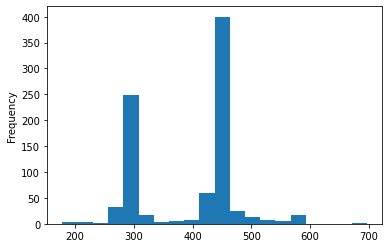

In [ ]:
y_df['ppi'].plot(kind = 'hist', bins = 20)

## most of the phones have ppi in either 300 and 450